# **Investigating Movies Dataset**

# Description
**Overview:** The Movies main dataset contains 7886 entry with 15 column giving information about the data,
name, for the movie name, rating, for the average rating of the movie, etc. In this analysis the purpose is to find the key indicators of the success of a movie while investigating the most successful movies in the dataset.

**Possible Questions:**

- The most successful director/writer/star/production company

-  How budget/runtime changed over time?

-  What is the theme of most movies in the dataset?

-  Gross-Budget correlation?

-  Investigating other correlations

- Investigating characteristics over the years

In [124]:
# Import necessary packages and load `winequality_edited.csv`
%matplotlib inline
import requests, os
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt 
import statistics
from wordcloud import WordCloud, STOPWORDS
plt.rcParams["figure.figsize"] = (12, 8)
import seaborn as sns
sns.set_theme()
import warnings
warnings.filterwarnings('ignore')
#from IPython.display import display, HTML
#CSS = """
#.output {
#    flex-direction: row;
#}
#"""

#HTML('<style>{}</style>'.format(CSS))

#pd.set_option('display.max_rows', None)

# **Exploring Data**

In [125]:
df = pd.read_csv(r'C:\Users\Amged\Desktop\AlexTheAnalyst Project\movies.csv')
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


Most of the columns have a few number of null values, except for 'budget' column having 2171 null values. dropping this number of values would greatly affect the accuracy of the analysis.

In [127]:
df.isnull().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [128]:
df = df.convert_dtypes()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   string 
 1   rating    7591 non-null   string 
 2   genre     7668 non-null   string 
 3   year      7668 non-null   Int64  
 4   released  7666 non-null   string 
 5   score     7665 non-null   Float64
 6   votes     7665 non-null   Int64  
 7   director  7668 non-null   string 
 8   writer    7665 non-null   string 
 9   star      7667 non-null   string 
 10  country   7665 non-null   string 
 11  budget    5497 non-null   Int64  
 12  gross     7479 non-null   Float64
 13  company   7651 non-null   string 
 14  runtime   7664 non-null   Int64  
dtypes: Float64(2), Int64(4), string(9)
memory usage: 943.6 KB


In [129]:
#Duplicates?
df.duplicated().value_counts()

False    7668
dtype: int64

### **Initial Findings**
- The dataset has no duplicate values, one less thing to worry about. 
- Yet, we have to deal with the high number of missing values in budget column.
- One way to go is dropping all null values but this will leave us with only 5000 row of data (X)
- Another way is replacing unfixable data by a label like 'Not Applicable' (X)
- the best approach or at least better than the last two approaches is to seek an extension for the data using another external data sources

# **Data Cleaning**

Using two other external datasets, we would fill the missing values of the original dataframe

In [130]:
external_data1 = pd.read_csv(r'C:\Users\Amged\Desktop\IMDb_movies.csv')
external_data2 = pd.read_csv(r'C:\Users\Amged\Desktop\movies_metadata.csv')


In [131]:
modex1 = external_data1[['title','original_title','year','date_published','genre','duration','director','writer','production_company','avg_vote','votes','description']]
modex1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85855 entries, 0 to 85854
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   title               85855 non-null  object 
 1   original_title      85855 non-null  object 
 2   year                85855 non-null  object 
 3   date_published      85855 non-null  object 
 4   genre               85855 non-null  object 
 5   duration            85855 non-null  int64  
 6   director            85768 non-null  object 
 7   writer              84283 non-null  object 
 8   production_company  81400 non-null  object 
 9   avg_vote            85855 non-null  float64
 10  votes               85855 non-null  int64  
 11  description         83740 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 7.9+ MB


First external dataset has around 85,000 entry, we took only certain columns from it, we took the columns that would help with missing values in the original data. In addition to that, 'description' column will be very helpful in analyzing the main theme of the movies so we wouldn't depend only on analyzing movies' titles but also we would have the general description of each movie.

In [132]:
modex2 = external_data2[['budget','original_title','overview','revenue','runtime','year','title']]
modex2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   budget          45466 non-null  object 
 1   original_title  45466 non-null  object 
 2   overview        44512 non-null  object 
 3   revenue         45460 non-null  float64
 4   runtime         45203 non-null  float64
 5   year            45295 non-null  float64
 6   title           45460 non-null  object 
dtypes: float64(3), object(4)
memory usage: 2.4+ MB


Same here for the second external dataset, overview column is for filling null values in description column, if exists.

In [133]:
clean_df = pd.DataFrame()

In [134]:
merged1 =pd.merge(
    df,
    modex1,
    how="left",
    on=None,
    left_on=['name','director'],
    right_on=['original_title','director'],
    left_index=False,
    right_index=False,
    sort=False,
    suffixes=("_df", "_m1"),
    copy=True,
    indicator=False,
    validate=None,
)

In [135]:
modex2['year'] = modex2['year'].astype('object')
merged2 = pd.merge(
    merged1,
    modex2,
    how="left",
    on=None,
    left_on=['name','year_df'],
    right_on=['title','year'],
    left_index=False,
    right_index=False,
    sort=False,
    suffixes=("_x", "_y"),
    copy=True,
    indicator=False,
    validate=None,
)
merged2.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 7689 entries, 0 to 7688
Data columns (total 33 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                7689 non-null   object 
 1   rating              7612 non-null   string 
 2   genre_df            7689 non-null   string 
 3   year_df             7689 non-null   object 
 4   released            7687 non-null   string 
 5   score               7686 non-null   Float64
 6   votes_df            7686 non-null   Int64  
 7   director            7689 non-null   object 
 8   writer_df           7686 non-null   string 
 9   star                7688 non-null   string 
 10  country             7686 non-null   string 
 11  budget_x            5510 non-null   Int64  
 12  gross               7500 non-null   Float64
 13  company             7672 non-null   string 
 14  runtime_x           7685 non-null   Int64  
 15  title_x             6533 non-null   object 
 16  origin

- In 'merged1' we joined the main dataset with the 1st external dataset based on having same movie title and director.

- The output was then joined with the 2nd external dataset also on the movie title and year of release.

- Now we would seek filling columns of the original dataframe with the new columns.

- New columns have null values so, we expect to see nulls even after joining, but it will certainly be less than the original number of nulls

In [136]:
merged2['budget_x'] = merged2['budget_x'].fillna(merged2['budget_y'])
merged2.drop(columns=['budget_y'],inplace=True)
merged2['budget_x'].isnull().sum()

525

- Nulls in budget column dropped from 2171 null to 525, that's may not be the best we wanted after using two external data sources, but at least it's better than the original case.



In [137]:
merged2['runtime_x'] = merged2['runtime_x'].fillna(merged2['runtime_y'])
merged2['runtime_x'] = merged2['runtime_x'].fillna(merged2['duration'])
merged2.drop(columns=['runtime_y','duration'],inplace=True)
merged2['runtime_x'].isnull().sum()

1

In [138]:
merged2['production_company'] = merged2['production_company'].astype('string')
merged2['company'] = merged2['company'].fillna(merged2['production_company'])
merged2.drop(columns=['production_company'],inplace=True)
merged2['company'].isnull().sum()

16

- Runtime column had 4 null values, it dropped to only 1 value. 4 number of nulls wasn't a significant number that required fixing, but I'm fixing it along the way of fixing the other significant factors.
- Same goes for the production company column only 1 missing value was retrieved after joining

In [139]:
merged2['gross'] = merged2['gross'].fillna(merged2['revenue'])
merged2.drop(columns=['revenue'],inplace=True)
merged2['gross'].isnull().sum()

91

- Using the new 'revenue' column we dropped the missing values in 'gross' column from 189 to 91, quite an improvement but again, the main focus was on the budget column.

In [140]:
merged2['description'] = merged2['description'].fillna(merged2['overview'])
merged2.drop(columns=['overview'],inplace=True)
merged2['description'].isnull().sum()

365

- Now, we have a description column with a summary for each movie, we tried fixing some of its missing values using overview column from the 2nd external data source

Too many columns that aren't needed anymore, we would use a new clean dataframe and put the important columns in it, this will be the main source of data during the analysis.

In [141]:
clean_df = merged2.copy()
clean_df.columns

Index(['name', 'rating', 'genre_df', 'year_df', 'released', 'score',
       'votes_df', 'director', 'writer_df', 'star', 'country', 'budget_x',
       'gross', 'company', 'runtime_x', 'title_x', 'original_title_x',
       'year_m1', 'date_published', 'genre_m1', 'writer_m1', 'avg_vote',
       'votes_m1', 'description', 'original_title_y', 'year', 'title_y'],
      dtype='object')

In [142]:

clean_df.drop(columns=['title_x','original_title_x','year_m1','genre_m1', 'writer_m1',
       'avg_vote', 'votes_m1','original_title_y', 'year', 'title_y','date_published'], inplace=True)

clean_df.rename(columns = {'genre_df':'genre', 'year_df': 'year', 'writer_df':'writer', 'votes_df': 'votes','runtime_x': 'runtime', 'budget_x': 'budget'}, inplace = True)


In [143]:
clean_df.isnull().sum()

name             0
rating          77
genre            0
year             0
released         2
score            3
votes            3
director         0
writer           3
star             1
country          3
budget         525
gross           91
company         16
runtime          1
description    365
dtype: int64

In [144]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7689 entries, 0 to 7688
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         7689 non-null   object 
 1   rating       7612 non-null   string 
 2   genre        7689 non-null   string 
 3   year         7689 non-null   object 
 4   released     7687 non-null   string 
 5   score        7686 non-null   Float64
 6   votes        7686 non-null   Int64  
 7   director     7689 non-null   object 
 8   writer       7686 non-null   string 
 9   star         7688 non-null   string 
 10  country      7686 non-null   string 
 11  budget       7164 non-null   Int64  
 12  gross        7598 non-null   Float64
 13  company      7673 non-null   string 
 14  runtime      7688 non-null   Int64  
 15  description  7324 non-null   object 
dtypes: Float64(2), Int64(3), object(4), string(7)
memory usage: 1.0+ MB


**Good improvement regarding the missing data, about time we start analyzing and visualizing our data!**

# **Exploratory Data Analysis**


## 1. Finding Correlations
>****
>##### For finding correlations between different factors affecting movie industry; first, we will try to search for correlations.
>##### After that we will be expanding our search for correlations using non-numerical values.

In [145]:
#clean_df['bUdget'] = clean_df['budget'].astype('Int64')
clean_df = clean_df.convert_dtypes()
Corr_Matrix = clean_df.corr(method='pearson')
Corr_Matrix

,year,score,votes,budget,gross,runtime
year,1.000000,0.098110,0.222791,0.348645,0.260649,0.120406
score,0.098110,1.000000,0.409002,0.055343,0.185023,0.399626
votes,0.222791,0.409002,1.000000,0.480386,0.631465,0.308665
budget,0.348645,0.055343,0.480386,1.000000,0.751795,0.286237
gross,0.260649,0.185023,0.631465,0.751795,1.000000,0.243977
runtime,0.120406,0.399626,0.308665,0.286237,0.243977,1.000000


- Only Numeral values appeared, using this -for now- we will investigate the correlation between gross/budget
>>
>>
>>
**Gross/Budget Correlation**

<AxesSubplot:xlabel='budget', ylabel='gross'>

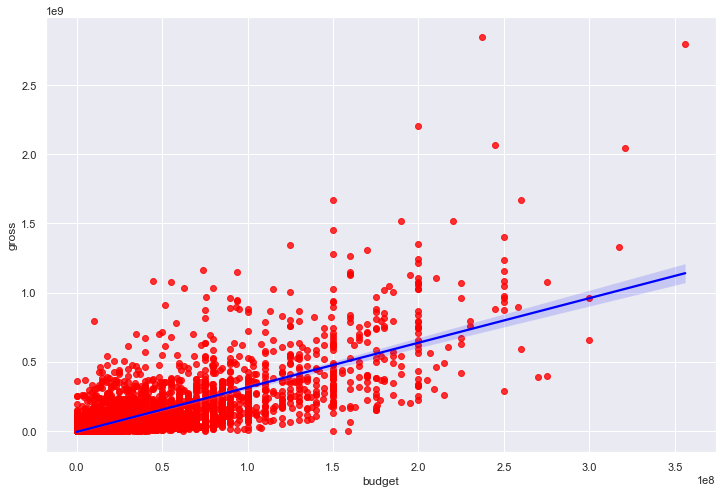

In [146]:
sns.regplot(x='budget', y = 'gross',data=clean_df[['gross','budget']].astype('float64'), scatter_kws={"color" : "red"}, line_kws = {"color" : "blue"})

- Gross and budget are positively correlated, this makes sense as investing more money in a movie will significantly affect the quality and revenue of that movie.

**Correlation Heatmap**

Text(0.5, 1.0, 'Movie Features')

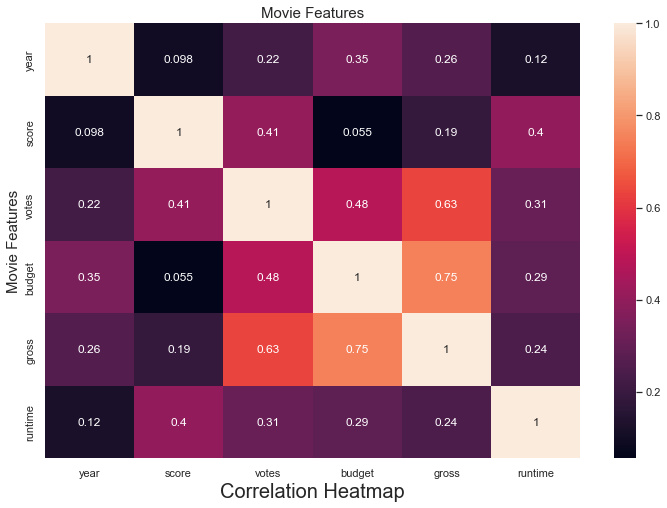

In [115]:
sns.heatmap(Corr_Matrix, annot=True)
plt.xlabel('Correlation Heatmap', fontsize = 20)
plt.ylabel('Movie Features', fontsize = 15)
plt.title('Movie Features', fontsize = 15)


- Heatmap demonstrating the correlations visually, lowest correlations(in black) and highest correlations (brighter colors) are now visually clarified.

- detailed conclusions are to be discussed after getting a wider and more detailed correlation table.

**Creating detailed correlation table:**

Non numerical values doesn't appear in the correlation table so, this what we will be doing in the next steps:
- Categorizing non-numerical data and giving each category a code.
- Creating correlation table using these codes.

In [31]:
Numerical_df = clean_df.copy()
for col in Numerical_df.columns:
    if (Numerical_df[col].dtype) not in  ['int64','Int64','Float64']:
        Numerical_df[col] = Numerical_df[col].astype('category')
        Numerical_df[col] = Numerical_df[col].cat.codes


Numerical_df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,description
0,6587,6,6,1980,1705,8.4,927000,2589,4014,1047,54,19000000,46998772.0,2319,146,666
1,5573,6,1,1980,1492,5.8,65000,2269,1632,327,55,4500000,58853106.0,731,104,4619
2,5142,4,0,1980,1771,8.7,1200000,1111,2567,1745,55,18000000,538375067.0,1540,124,2792
3,286,4,4,1980,1492,7.7,221000,1301,2000,2246,55,3500000,83453539.0,1812,88,2848
4,1027,6,4,1980,1543,7.3,108000,1054,521,410,55,6000000,39846344.0,1777,98,3157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7684,3705,-1,6,2020,2964,3.1,18,1500,2289,2421,55,7000,<NA>,-1,90,-1
7685,1678,-1,4,2020,1107,4.7,36,774,2614,1886,55,<NA>,<NA>,539,90,-1
7686,4717,-1,6,2020,193,5.7,29,2061,2683,2040,55,58750,<NA>,941,<NA>,-1
7687,2843,-1,6,2020,2817,<NA>,<NA>,1184,1824,450,55,15000,<NA>,-1,120,-1


Text(0.5, 1.0, 'Movie Features')

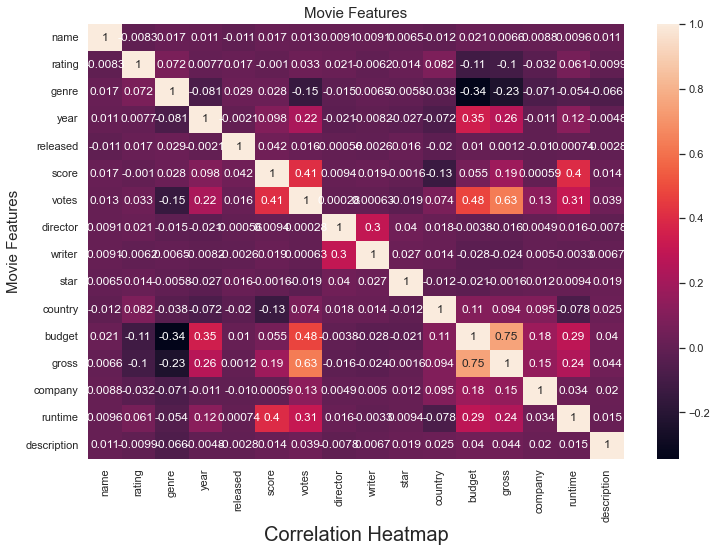

In [116]:
Numerical_Corr_Matrix = Numerical_df.corr()
sns.heatmap(Numerical_Corr_Matrix, annot=True)
plt.xlabel('Correlation Heatmap', fontsize = 20)
plt.ylabel('Movie Features', fontsize = 15)
plt.title('Movie Features', fontsize = 15)


**Correlation Heatmap Conclusions**

- Surprisingly, score wasn't correlated with budget or gross.
- Gross has a  strong positive correlation with count of votes.
- Both budget and gross have relatively strong positive correlation with count of votes.
- Budget and Gross are strongly correlated.
- Score and runtime have moderate positive correlation. 
  

In [148]:
Corr_pairs = Numerical_Corr_Matrix.unstack()
Sorted_pairs = Numerical_Corr_Matrix.unstack().sort_values()
Sorted_pairs[Sorted_pairs > 0.5].head(4)

gross   votes     0.631465
votes   gross     0.631465
gross   budget    0.751795
budget  gross     0.751795
dtype: float64

## 2. The most successful director/writer/actor/production company

In [36]:
com_df = clean_df.copy()

**Function to help with generating total and average values while sorting them:**

In [149]:
def movstat(criteria, aggregate, sorting):
    com_sum = pd.DataFrame(com_df.groupby(criteria)[aggregate].sum().sort_values(ascending=False))
    com_sum.columns = ['Total']
    com_mean = pd.DataFrame(com_df.groupby(criteria)[aggregate].mean().sort_values(ascending=False))
    com_mean.columns = ['Average']
    com_count = pd.DataFrame(com_df.groupby(criteria)[aggregate].count().sort_values(ascending=False))
    com_count.columns = ['Number']
    com_pivot = pd.concat((com_sum, com_mean, com_count), axis=1)
    
    com_pivot = com_pivot[com_pivot['Number'] > 10].sort_values(sorting, ascending=False).head(10)
    display(com_pivot)



**The top production companies in the industry:**

In [38]:
print('Arranged by Average')
movstat('company','gross','Average')
print('Arranged by Total')
movstat('company','gross','Total')

Arranged by Average


,Total,Average,Number
company,,,
Marvel Studios,15065592411.0,1255466034.25,12
Pixar Animation Studios,7886344526.0,657195377.166667,12
DreamWorks Animation,11873612858.0,424057602.071429,28
Walt Disney Animation Studios,6751509051.0,397147591.235294,17
Walt Disney Pictures,36327887792.0,295348681.235772,123
Warner Bros.,56506016032.0,169179688.718563,334
Twentieth Century Fox,40257053857.0,167737724.404167,240
Dreamworks Pictures,11635441081.0,153097908.960526,76
Summit Entertainment,8373718838.0,139561980.633333,60


Arranged by Total


,Total,Average,Number
company,,,
Warner Bros.,56506016032.0,169179688.718563,334
Universal Pictures,52546875390.0,138646109.208443,379
Columbia Pictures,43008941346.0,129545004.054217,332
Paramount Pictures,40666612753.0,126293828.425466,322
Twentieth Century Fox,40257053857.0,167737724.404167,240
Walt Disney Pictures,36327887792.0,295348681.235772,123
New Line Cinema,19883797684.0,114274699.333333,174
Marvel Studios,15065592411.0,1255466034.25,12
DreamWorks Animation,11873612858.0,424057602.071429,28


- Although Warner Bros gained the highest total gross, it dropped to #6 place when sorting by average, Marvel studios reached the top with 12 movies.

**The top Directors in the industry:**

In [39]:
print('Arranged by Average')
movstat('director','gross','Average')
print('Arranged by Total')
movstat('director','gross','Total')


Arranged by Average


,Total,Average,Number
director,,,
Peter Jackson,6618045788.0,601640526.181818,11
Michael Bay,6451692798.0,496284061.384615,13
Christopher Nolan,5153547948.0,468504358.909091,11
Steven Spielberg,9629049370.0,356631458.148148,27
Roland Emmerich,3868662044.0,351696549.454545,11
Chris Columbus,4133016380.0,275534425.333333,15
Robert Zemeckis,4286713824.0,252159636.705882,17
M. Night Shyamalan,3009570374.0,250797531.166667,12
Sam Raimi,3288039396.0,234859956.857143,14


Arranged by Total


,Total,Average,Number
director,,,
Steven Spielberg,9629049370.0,356631458.148148,27
Peter Jackson,6618045788.0,601640526.181818,11
Michael Bay,6451692798.0,496284061.384615,13
Christopher Nolan,5153547948.0,468504358.909091,11
Tim Burton,4456348890.0,234544678.421053,19
Ron Howard,4409188200.0,183716175.0,24
Robert Zemeckis,4286713824.0,252159636.705882,17
Ridley Scott,4140927749.0,172538656.208333,24
Chris Columbus,4133016380.0,275534425.333333,15


**The top Actors in the industry:**

In [40]:
print('Arranged by Total')
movstat('star','gross','Total')

print('Arranged by Average')
movstat('star','gross','Average')



Arranged by Total


,Total,Average,Number
star,,,
Robert Downey Jr.,11859526234.0,564739344.47619,21
Tom Hanks,9952423823.0,242742044.463415,41
Tom Cruise,9602552559.0,282428016.441176,34
Daniel Radcliffe,7954064886.0,611851145.076923,13
Will Smith,7947279234.0,345533879.73913,23
Johnny Depp,7444238998.0,225582999.939394,33
Leonardo DiCaprio,6963367648.0,348168382.4,20
Vin Diesel,6036312568.0,402420837.866667,15
Dwayne Johnson,5711270624.0,259603210.181818,22


Arranged by Average


,Total,Average,Number
star,,,
Daniel Radcliffe,7954064886.0,611851145.076923,13
Robert Downey Jr.,11859526234.0,564739344.47619,21
Vin Diesel,6036312568.0,402420837.866667,15
Leonardo DiCaprio,6963367648.0,348168382.4,20
Will Smith,7947279234.0,345533879.73913,23
Mike Myers,4076940977.0,339745081.416667,12
Shia LaBeouf,3355327806.0,305029800.545455,11
Tom Cruise,9602552559.0,282428016.441176,34
Elijah Wood,3641925695.0,280148130.384615,13


**Highest grossing combination of Actor/Director:**

In [161]:
com_df.groupby(['director','star'])[['gross','budget']].sum().sort_values(by='gross',ascending=False).head(6)


,,gross,budget
director,star,,
Anthony Russo,Robert Downey Jr.,4845861082.0,677000000
David Yates,Daniel Radcliffe,4195991640.0,775000000
Gore Verbinski,Johnny Depp,3187666972.0,1015000000
J.J. Abrams,Daisy Ridley,3147754289.0,520000000
Peter Jackson,Elijah Wood,2991216079.0,281000000
Joss Whedon,Robert Downey Jr.,2921625055.0,470000000


**Adding the production company in the combination:**

In [160]:
com_df.groupby(['director','star','company'])[['gross','budget']].sum().sort_values(by='gross',ascending=False).head(6)


,,,gross,budget
director,star,company,,
Anthony Russo,Robert Downey Jr.,Marvel Studios,4845861082.0,677000000
David Yates,Daniel Radcliffe,Warner Bros.,4195991640.0,775000000
Peter Jackson,Elijah Wood,New Line Cinema,2991216079.0,281000000
Gore Verbinski,Johnny Depp,Walt Disney Pictures,2941942369.0,880000000
Joss Whedon,Robert Downey Jr.,Marvel Studios,2921625055.0,470000000
James Cameron,Sam Worthington,Twentieth Century Fox,2847246203.0,237000000


## 3. Movie Characteristics (Rating/Theme/Genre)

**3.1 Investigating which movie rating got the highest grossing:**

Text(0.5, 1.0, 'Most grossed movie ratings')

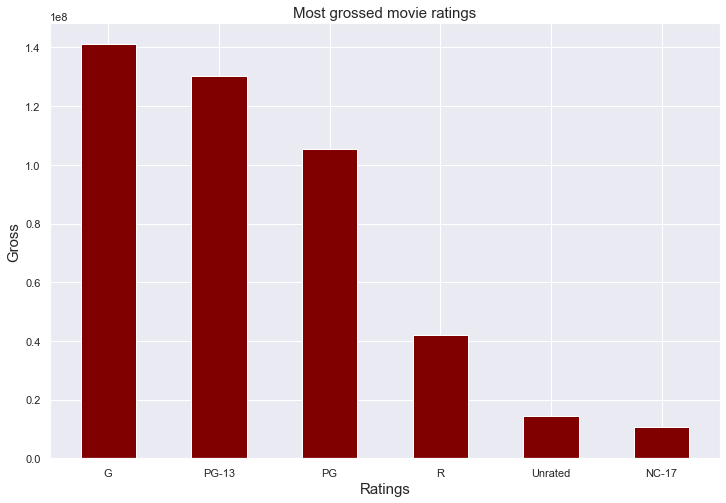

In [122]:
com_df['rating'][com_df['rating'] == 'Not Rated'] = 'Unrated'
com_mean = pd.DataFrame(com_df.groupby('rating')['gross'].mean().sort_values(ascending=False))
com_mean.columns = ['Average']
com_count = pd.DataFrame(com_df.groupby('rating')['gross'].count().sort_values(ascending=False))
com_count.columns = ['Number']
com_pivot = pd.concat((com_mean, com_count), axis=1)
com_pivot = com_pivot[com_pivot['Number'] > 10].sort_values('Average', ascending=False).head(10)

tags = com_pivot['Average'].index
bar_values = com_pivot['Average'].values
plt.bar(tags,bar_values,0.5, color='maroon')
plt.xlabel('Ratings', fontsize = 15)
plt.ylabel('Gross', fontsize = 15)
plt.title('Most grossed movie ratings', fontsize = 15)


- G rating came first as the highest grossing, G is for General Audiences — all ages admitted, meaning there is nothing in theme, language, nudity, sex, violence or other matters that the ratings board thinks would offend parents whose younger children view the picture.

- PG-13, placed second, this rating is a stronger caution for parents that content included may not be appropriate for children under 13 (pre-teen ages).

- Third place, PG – Parental Guidance Suggested Some material may not be suitable for children. Parents urged to give "parental guidance". May contain some material parents might not like for their young children.

**3.2 Main theme of movies**

**3.2.1 Using movies' description:**

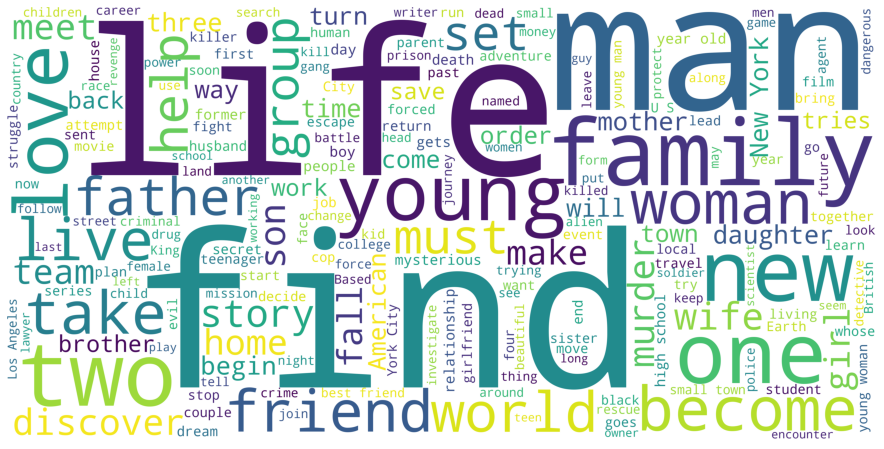

In [123]:
overviewdf = clean_df['description'][clean_df['description'] != pd.isna(clean_df['description'])]
plt.figure(figsize=(16,8))
plt.imshow(WordCloud(stopwords=STOPWORDS, background_color='white', height=2000, 
                     width=4000).generate(' '.join(overviewdf)))
plt.axis('off')
plt.show()

- From movie descriptions the most used words were: (life, find, man, family, woman, love, world, friend)

**3.2.2 Using movies' titles:**

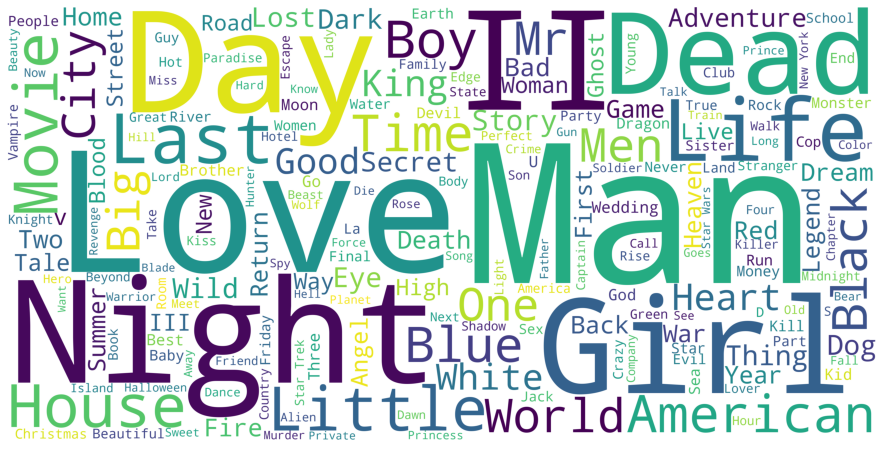

In [52]:
plt.figure(figsize=(16,8))
plt.imshow(WordCloud(stopwords=STOPWORDS, background_color='white', height=2000, 
                     width=4000).generate(' '.join(clean_df['name'])))
plt.axis('off')
plt.show()

- From movies' titles the most used words were: (Love,man, girl, Dead, Night)

- **This gives a conclusions that the main theme of most movies was about topics including love, life and death**

**3.3 Highest grossing movie genres:**

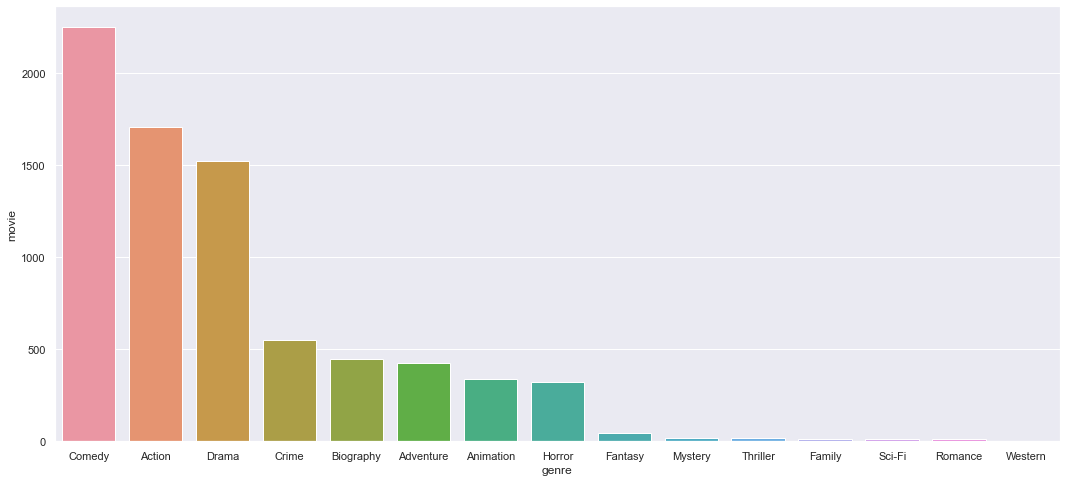

In [65]:
movgen = pd.DataFrame(clean_df['genre'].value_counts()).reset_index()
movgen.columns = ['genre', 'movie']
movgen.head(10)
plt.figure(figsize=(18,8))
sns.barplot(x='genre', y='movie', data=movgen.head(15))
plt.show()

## 4. Audience Effect (Score/Votes)

**4.1 Average score:**

<AxesSubplot:xlabel='score', ylabel='Density'>

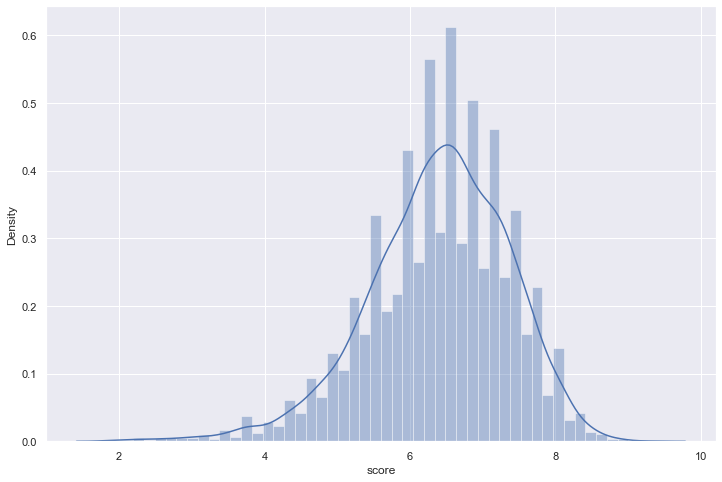

In [117]:
sns.distplot(clean_df['score'].dropna())

- Users gave an average rating of 6 out of 10 to the movies included in the dataset

**4.2 Highest rated and most voted movies:**

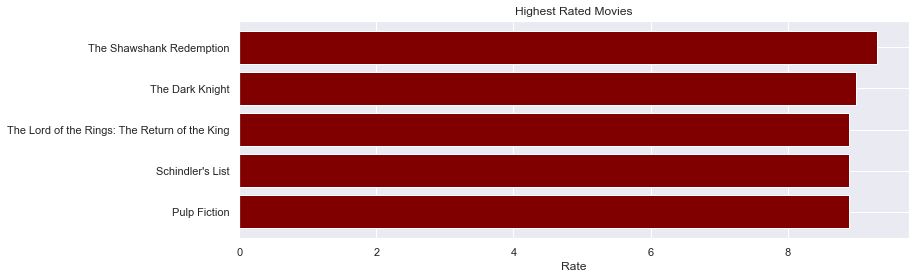

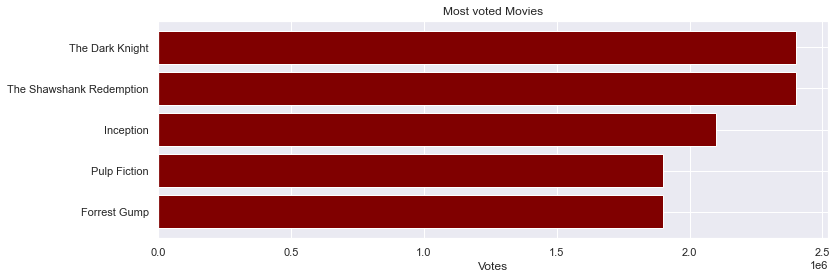

In [168]:
plt.figure(figsize=(12,4))
plt.barh(clean_df.sort_values('score', ascending=False)['name'].head(5), 
         clean_df.sort_values('score', ascending=False)['score'].head(5), 
         align='center', color='maroon')
plt.gca().invert_yaxis()
plt.xlabel("Rate")
plt.title("Highest Rated Movies")

plt.figure(figsize=(12,4))
plt.barh(clean_df.sort_values('votes', ascending=False)['name'].head(5), 
         clean_df.sort_values('votes', ascending=False)['votes'].head(5), 
         align='center', color='maroon')
plt.gca().invert_yaxis()
plt.xlabel("Votes")
plt.title("Most voted Movies")
plt.show()

- The Dark Knight and The Shawshank Redemption were the highest rated while maintaining their position as the most voted movies.
- Unlike Forrest Gump Which was one of the top voted but fell out of the top five rated movies. 

## 5. Timeline

**5.1 Runtime timeline:**

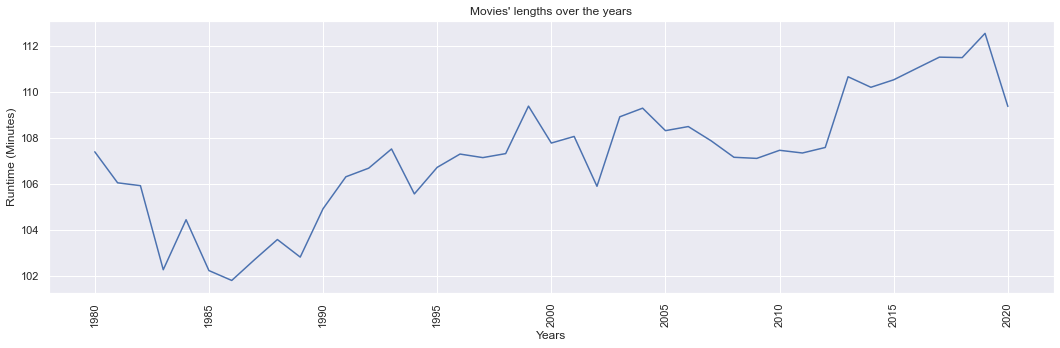

In [167]:
import matplotlib.ticker as plticker

#plt.figure(figsize=(18,5))
fig, ax = plt.subplots(figsize=(18,5))
year_runtime = clean_df.groupby('year')['runtime'].mean()
plt.plot(year_runtime.index, year_runtime)
plt.xticks(rotation='vertical')
#plt.show()
loc = plticker.MultipleLocator(base=5.0) # this locator puts ticks at regular intervals
ax.xaxis.set_major_locator(loc)
plt.xlabel("Years")
plt.ylabel("Runtime (Minutes)")
plt.title("Movies' lengths over the years")
plt.show()

- It appears that movies tend to become longer over the time while maintaining being in the range of 102 min. to 112 min.

**5.2 Budget/Gross timeline:**

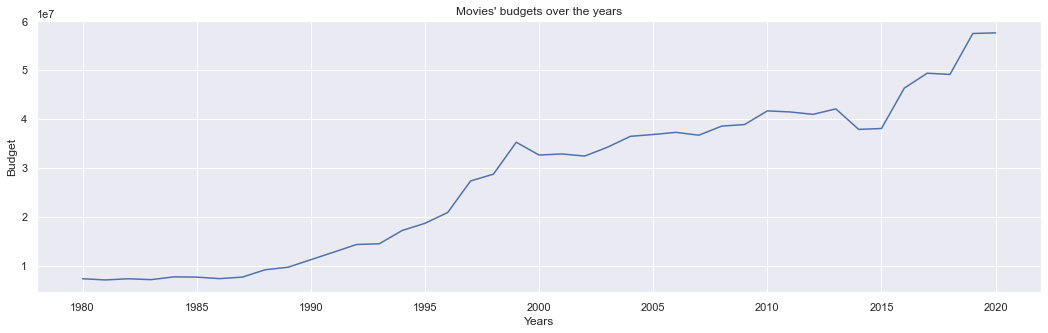

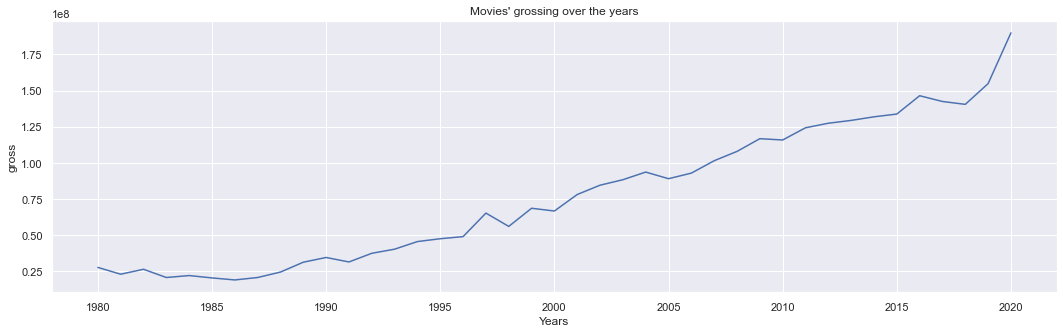

In [171]:
fig, ax = plt.subplots(figsize=(18,5))
year_runtime = clean_df.groupby('year')['budget'].mean()
plt.plot(year_runtime.index, year_runtime)
plt.xlabel("Years")
plt.ylabel("Budget")
plt.title("Movies' budgets over the years")
plt.show()

fig, ax = plt.subplots(figsize=(18,5))
year_runtime = clean_df.groupby('year')['gross'].mean()
plt.plot(year_runtime.index, year_runtime)
plt.xlabel("Years")
plt.ylabel("gross")
plt.title("Movies' grossing over the years")
plt.show()

- Both movie budgets and grossings tend to increase together as years pass

# **Conclusions**

- From Correlations section, Gross and budget showed the highest positive correlations, runtime showed positive correlation with score, so higher budget and longer movies meant higher grossing and score.

- Marvel studios proved to be the most successful on average and also contributing in the most successful combination of director/actor/company being: Anthony Russo/Robert Downey Jr./Marvel Studios

- G rating proved to be the highest grossing, followed by PG-13 and PG which gives a conclusions that movies with less restrictions made more money.

- Comedy, Action and Drama were the top Grossing genres, with main theme involving (love, man, woman, life and death)

- although runtime hasn't changed much over years, yet it shows tendency to increase with time accompanying buget and gross.
